In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
#from sklearn import metrics

# Customs
#import get_folia_tokens as gft

%matplotlib inline

In [2]:
def read_eval_scores(cv_label_folder):
    testeval = open(cv_label_folder + '/eval.out', 'r')
    scores = {}
    for line in testeval:
        info = list(filter(lambda a: a != '', line.split(' ')))
        if('processed' in info):
            continue
        elif('accuracy:' in info):
            scores['average'] = {}
            scores['average']['accuracy'] = float(info[1].split('%')[0])
            scores['average']['precision'] = float(info[3].split('%')[0])
            scores['average']['recall'] = float(info[5].split('%')[0])
            scores['average']['f1-score'] = float(info[7].split('\n')[0])
        else:
            label = info[0].split(':')[0]
            scores[label] = {}
            scores[label]['precision'] = float(info[2].split('%')[0])
            scores[label]['recall'] = float(info[4].split('%')[0])
            scores[label]['f1-score'] = float(info[6])
            scores[label]['support'] = int(info[7].split('\n')[0])
    return scores

In [3]:
def get_scores(cv_label_folder):
    scores = {}
    classes = ['event.flood', 'loc.focus', 'loc.supp', 'time', 'dmg.ppl.evac', 
                  'dmg.ppl.kill', 'dmg.prop', 'resp.donat', 'resp.supply', 'average']
    scores_major = read_eval_scores(cv_label_folder + 'major_classes')
    #del scores_major['average']
    for cls in classes:
        cls_ = '_'.join(cls.split('.'))
        if(cls_ not in scores_major):
            scores_major[cls_] = {'f1-score': 0, 'precision': 0,'recall': 0,'support': 0}
    scores_all = read_eval_scores(cv_label_folder + 'all_classes')
    #del scores_all['average']
    
    scores_binary = {}
    for cls in classes:
        cls_ = '_'.join(cls.split('.'))
        scores_binary[cls_] = read_eval_scores(cv_label_folder + 'Binaries/' + cls)[cls_]
    scores['major'] = scores_major
    scores['all'] = scores_all
    scores['binary'] = scores_binary
    return scores

In [4]:
def draw_graph(cv_label_folder, measurement='F1-Score'):
    scores = get_scores(cv_label_folder)
    classes = ['event.flood', 'loc.focus', 'loc.supp', 'time', 'dmg.ppl.evac', 
                  'dmg.ppl.kill', 'dmg.prop', 'resp.donat', 'resp.supply', 'average']
    major = []
    allcls = []
    binaries = []
    labels = []
    for cls in classes:
        cls_ = '_'.join(cls.split('.'))
        labels.append(cls_)
        major.append(scores['major'][cls_][measurement.lower()])
        allcls.append(scores['all'][cls_][measurement.lower()])
        binaries.append(scores['binary'][cls_][measurement.lower()])
    index = np.arange(len(labels))
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    bar_width = 0.25
    opacity = 1
    ax.bar(index, major, bar_width, color='b', label='Major Classes', alpha=opacity, zorder=3)
    ax.bar(index + bar_width, allcls, bar_width, color='m', label='All Classes', alpha=opacity, zorder=3)
    ax.bar(index + (2*bar_width), binaries, bar_width, color='c', label='One vs Rest', alpha=opacity, zorder=3)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels, rotation=75)
    ax.set_ylim([0,100])
    ax.grid(zorder=0)
    ax.legend()
    plt.xlabel('Labels')
    plt.ylabel(measurement + ' (%)')
    #plt.title('')
    plt.show()
    fig.savefig(cv_label_folder + '/Comparisons_' + measurement + '.png')

# Initialization 

In [5]:
mbt_folder = 'data/MBTData/'
folder_sliding = mbt_folder + 'Cross-validated/Sliding/'
folder_slidinggg = mbt_folder + 'Cross-validated/Sliding3/'
folder_final = mbt_folder + 'Cross-validated/Final1/'
folder_finalll = mbt_folder + 'Cross-validated/Final3/'

# Binaries

In [6]:
classes = ['event.flood', 'loc.focus', 'loc.supp', 'time', 'dmg.ppl.evac', 
              'dmg.ppl.kill', 'dmg.prop', 'resp.donat', 'resp.supply', 'average']

In [7]:
hede = pd.read_csv(folder_final + "Binaries/time/test.out", sep=' ', names=["token", "class", 'time'])

In [ ]:
for i, cls in enumerate(classes):
    df_tmp = pd.read_csv(folder_final + "Binaries/"+ cls +"/test.out", sep=' ', names=["token", "class", cls])
    if i == 0:
        datadf = df_tmp.copy()
    elif i == 3:
        break
    else:
        datadf = pd.merge(datadf, df_tmp, on=["token", "class"], how='outer')

In [ ]:
datadf

# F1-Score

In [30]:
draw_graph(folder_final, measurement='F1-Score')

FileNotFoundError: [Errno 2] No such file or directory: 'data/MBTData/Cross-validated/Final1/Binaries/average/eval.out'

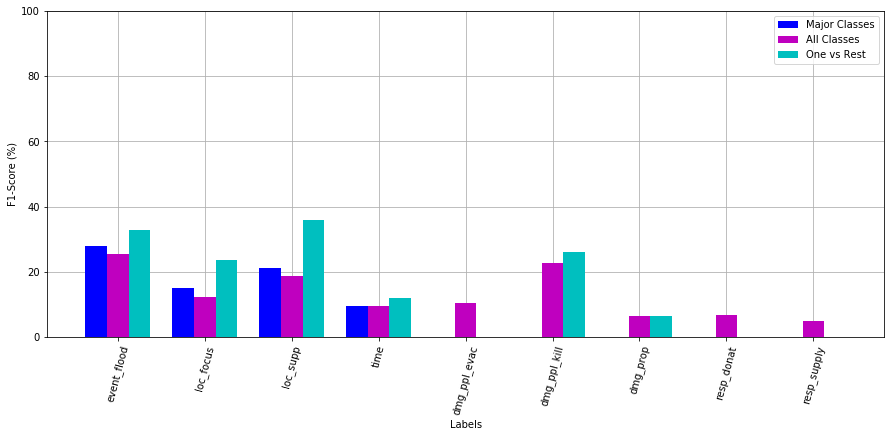

In [121]:
draw_graph(folder_sliding, measurement='F1-Score')

# Precision

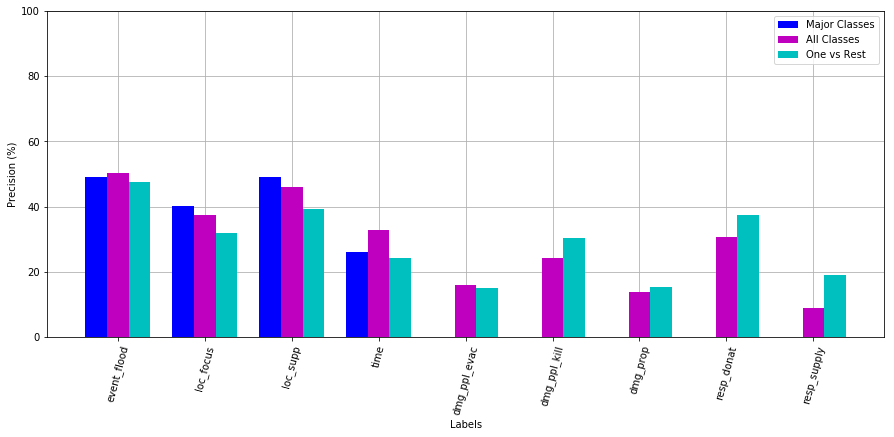

In [122]:
draw_graph(folder_final, measurement='Precision')

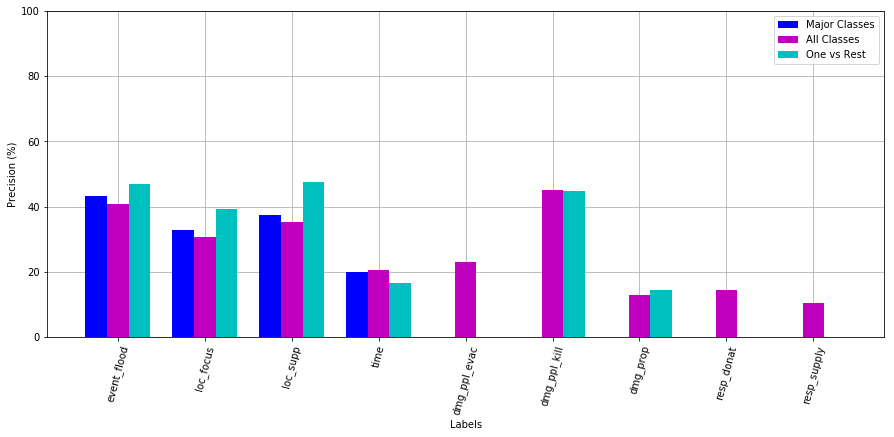

In [123]:
draw_graph(folder_sliding, measurement='Precision')

# Recall

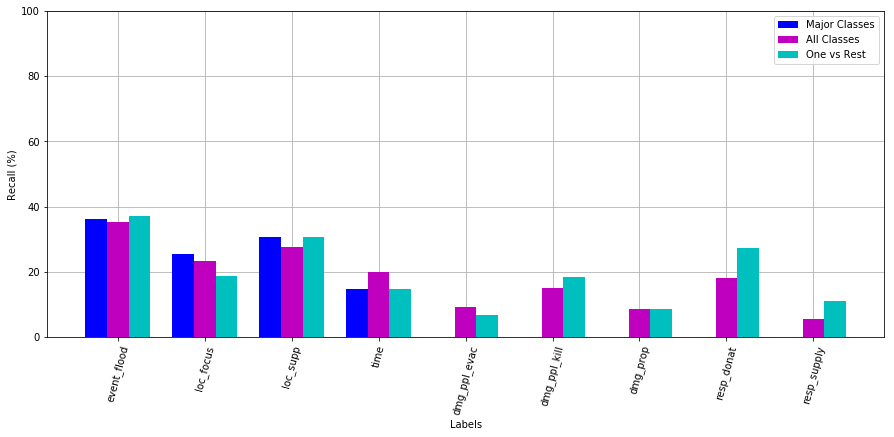

In [124]:
draw_graph(folder_final, measurement='Recall')

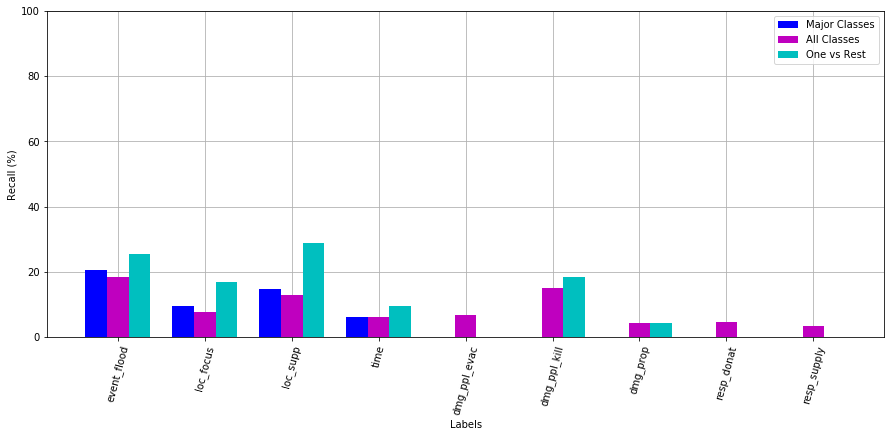

In [125]:
draw_graph(folder_sliding, measurement='Recall')